# Practical No 3:
# Aim: Detrending, deseasonalizing timeseries, detecting Cyclic variations and decomposing Time Series.

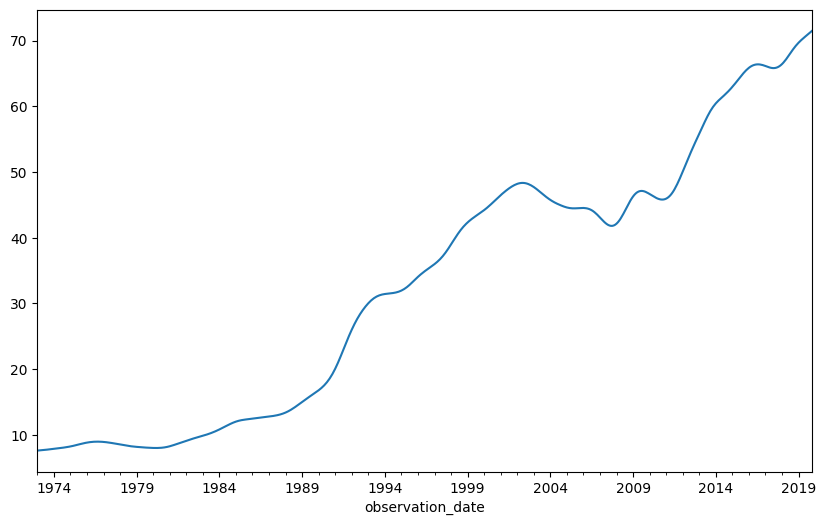

In [10]:
#trend
import pandas as pd
%matplotlib inline
from statsmodels.tsa.filters.hp_filter import hpfilter
df = pd.read_csv('India_Exchange_Rate_Dataset.csv',index_col=0,parse_dates=True)
EXINUS_cycle,EXINUS_trend = hpfilter(df['EXINUS'], lamb=1600)
EXINUS_trend.plot(figsize=(10,6)).autoscale(axis='x',tight=True)

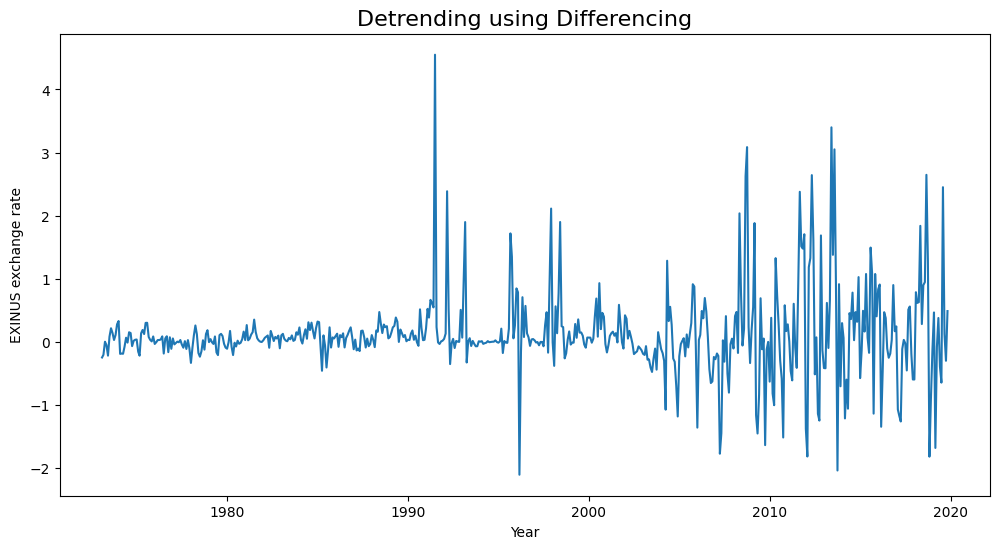

In [12]:
#Detrending using Differencing

import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_csv('India_Exchange_Rate_Dataset.csv',index_col=0,parse_dates=True)
diff = df.EXINUS.diff()
plt.figure(figsize=(12,6))
plt.plot(diff)
plt.title('Detrending using Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

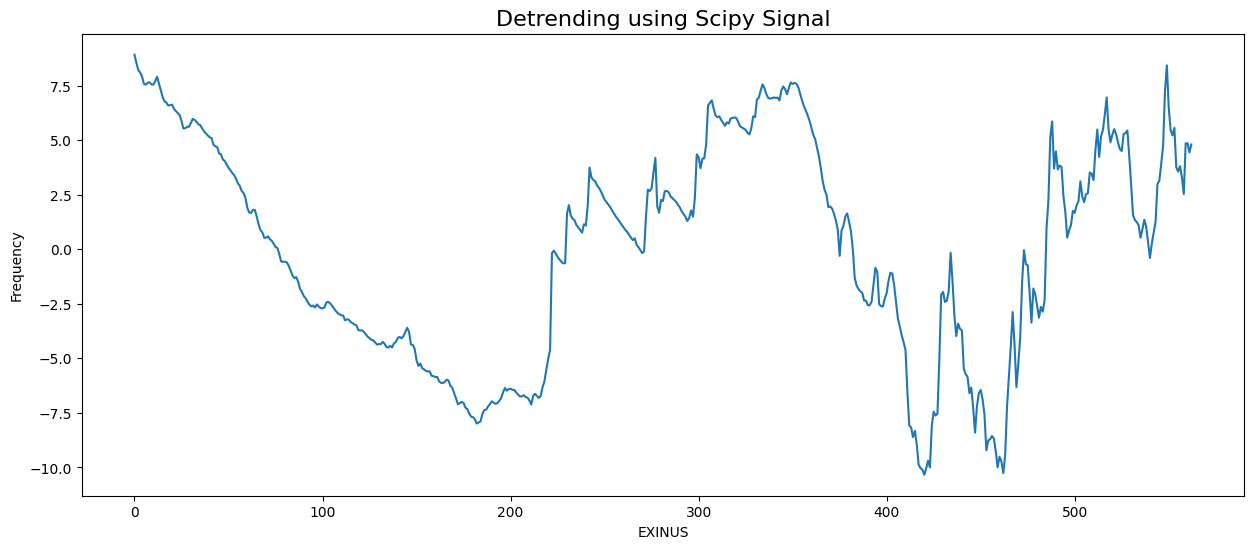

In [14]:
#Detrending using Scipy Signal

import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_csv('India_Exchange_Rate_Dataset.csv',index_col=0,parse_dates=True)
detrended = signal.detrend(df.EXINUS.values)
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.xlabel('EXINUS')
plt.ylabel('Frequency')
plt.title('Detrending using Scipy Signal', fontsize=16)
plt.show()

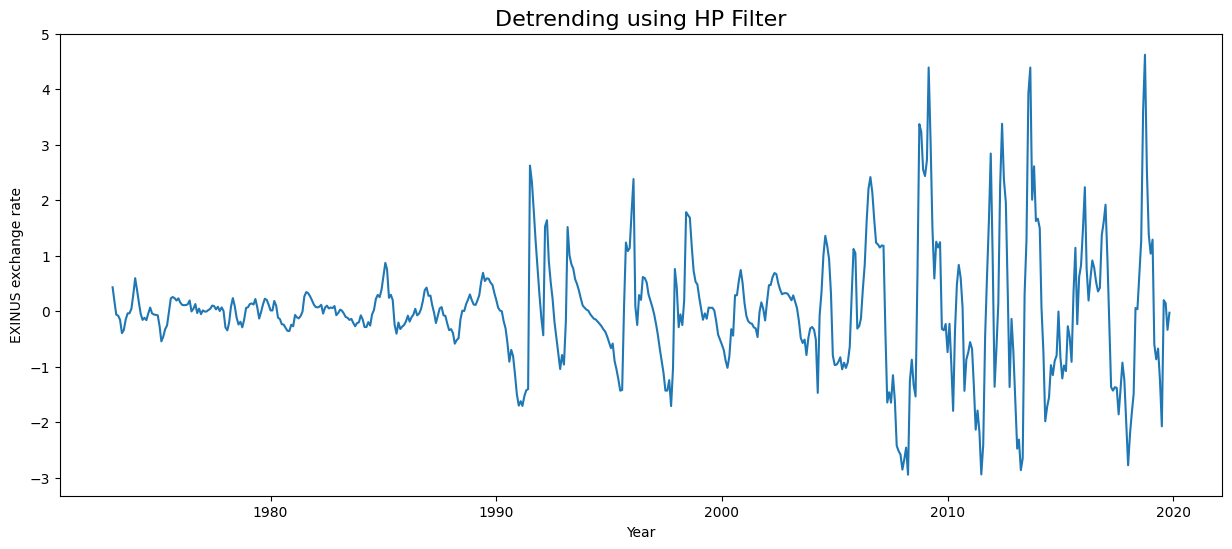

In [3]:
#Detrending using HP filter

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_csv('India_Exchange_Rate_Dataset.csv',index_col=0,parse_dates=True)
EXINUS_cycle,EXINUS_trend = hpfilter(df['EXINUS'], lamb=1600)
df['trend'] = EXINUS_trend
detrended = df.EXINUS - df['trend']
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

# Seasonality
Methods can be used to detect seasonality:
a. Multiple box plots 
b. Autocorrelation plots

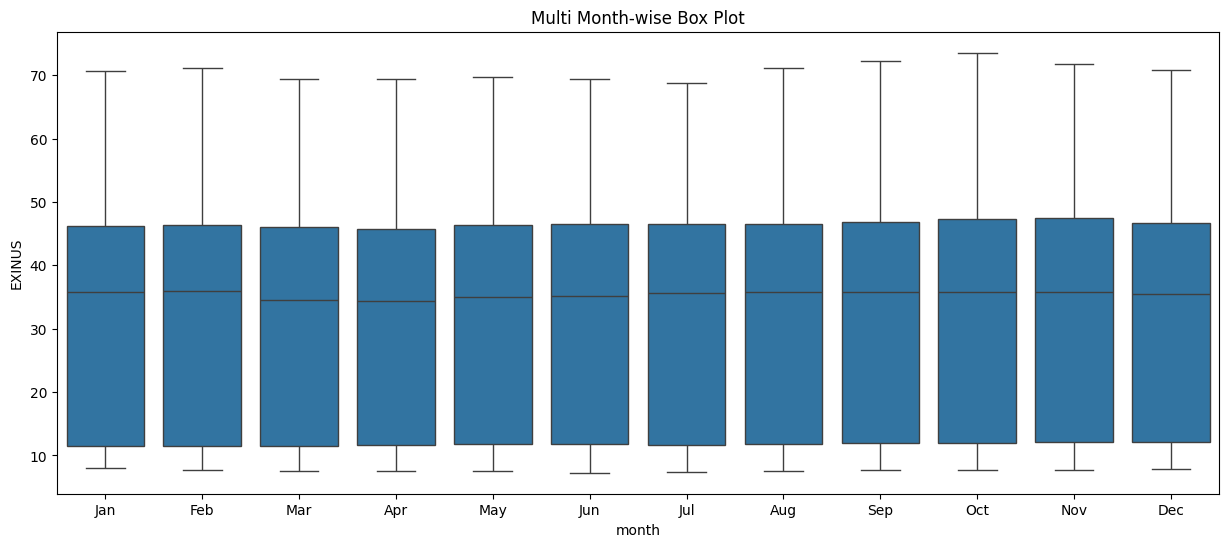

In [20]:
#A. Multi Month-wise Box Plot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_csv('India_Exchange_Rate_Dataset.csv',parse_dates=['observation_date'])
df['month'] = df['observation_date'].dt.strftime('%b')
df['year'] = [d.year for d in df.observation_date]
df['month'] = [d.strftime('%b') for d in df.observation_date]
years = df['year'].unique()
plt.figure(figsize=(15,6))
sns.boxplot(x='month', y='EXINUS', data=df).set_title("Multi Month-wise Box Plot")
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

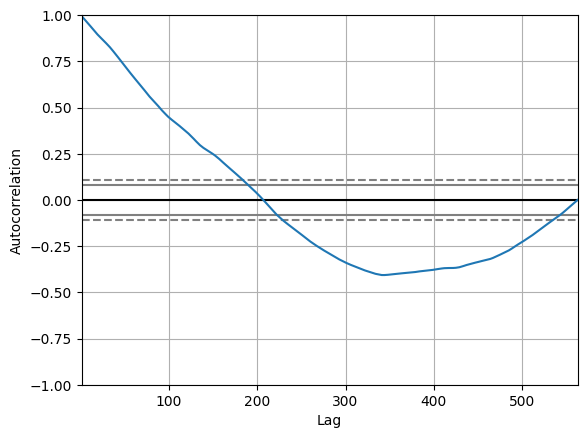

In [24]:
# B. Autocorrelation plot for seasonality

from pandas.plotting import autocorrelation_plot
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('India_Exchange_Rate_Dataset.csv',index_col=0,parse_dates=True)
#plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':220})
autocorrelation_plot(df.EXINUS.tolist())

# Deseasoning Time series

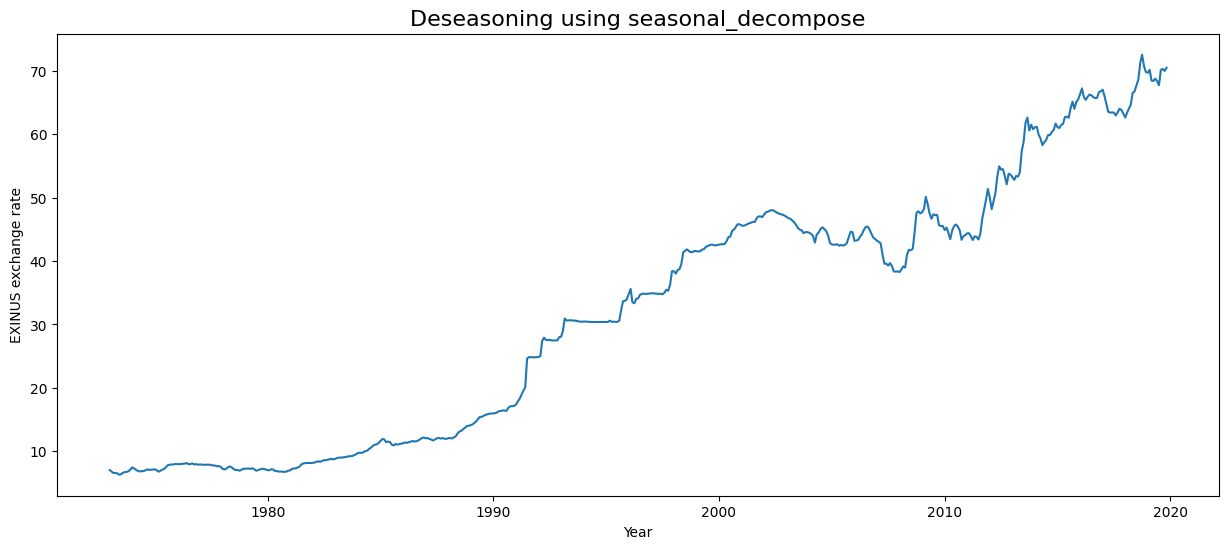

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_csv('India_Exchange_Rate_Dataset.csv',index_col=0,parse_dates=True)
result_mul = seasonal_decompose(df['EXINUS'], model='multiplicative', extrapolate_trend='freq')
deseason = df['EXINUS'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

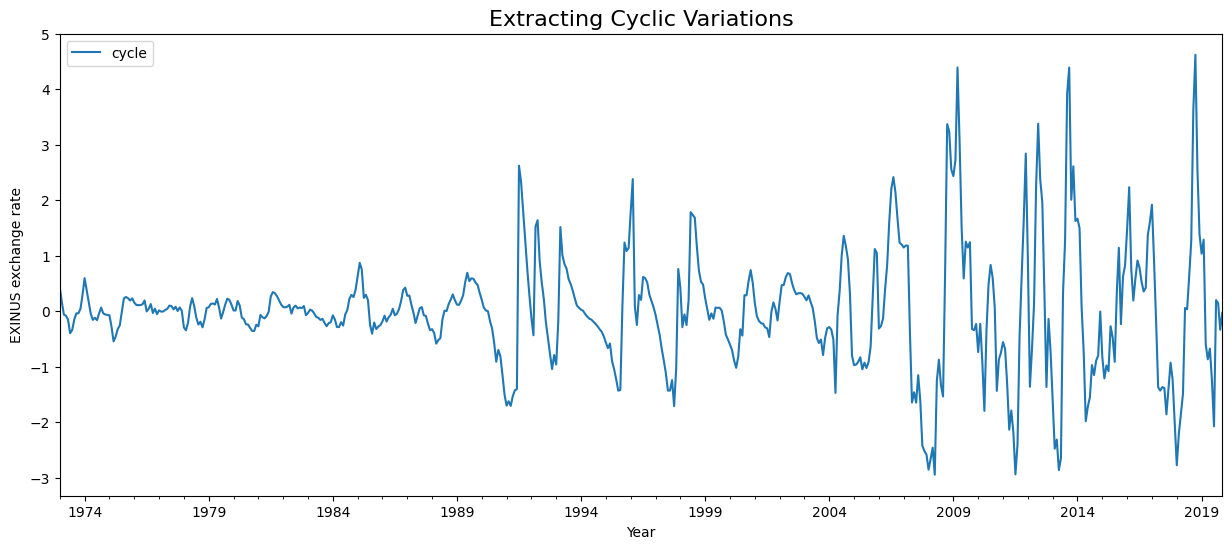

In [28]:
from statsmodels.tsa.filters.hp_filter import hpfilter
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_csv('India_Exchange_Rate_Dataset.csv',index_col=0,parse_dates=True)
EXINUS_cycle,EXINUS_trend = hpfilter(df['EXINUS'], lamb=1600)
df['cycle'] =EXINUS_cycle
df['trend'] =EXINUS_trend
df[['cycle']].plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title('Extracting Cyclic Variations', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

# Decompose Time series

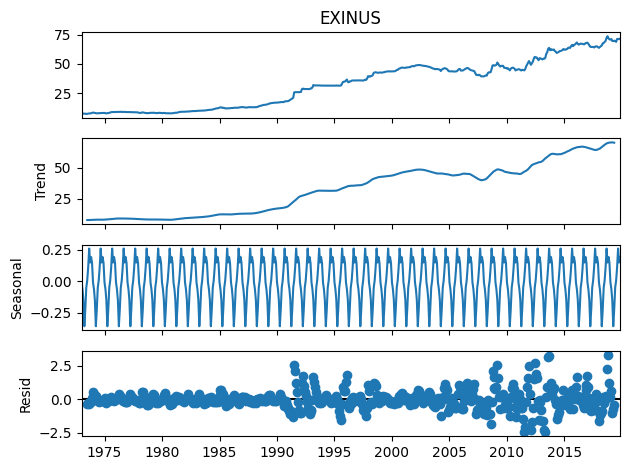

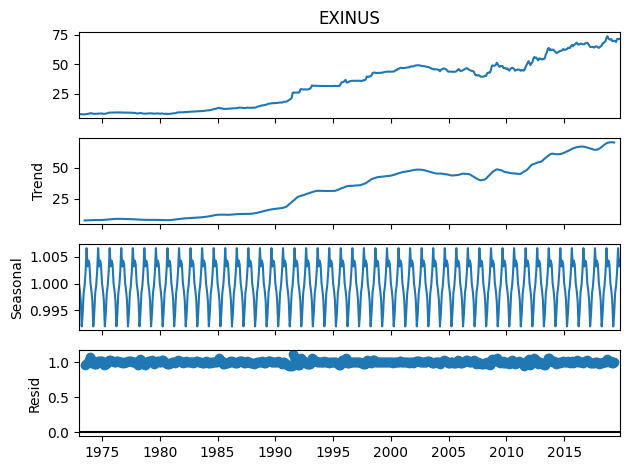

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_csv('India_Exchange_Rate_Dataset.csv',index_col=0,parse_dates=True)
result = seasonal_decompose(df['EXINUS'], model='add')
result.plot();
result = seasonal_decompose(df['EXINUS'], model='mul')
result.plot();